In [8]:
import qiskit

In [9]:
qiskit.__version__ 

'1.2.0'

Cargando variables de ambientes

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [11]:
# CARGAR PARA SIEMPRE LA VARIABLE DE ENTORNO (TOKEN) SE HACE UNA UNICA VEZ
#QiskitRuntimeService.save_account(channel="ibm_quantum", token="YOUR_TOKEN")

In [12]:
service = QiskitRuntimeService(channel="ibm_quantum")

Acceso al backend

In [13]:
backend = service.backend(name="ibm_brisbane")

Hello World on 2-qubit Bell State

In [14]:
from qiskit import QuantumCircuit

In [15]:
qc = QuantumCircuit(2)

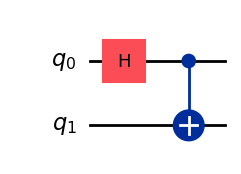

In [16]:
# Hadamard Gate on the zeroth qubit
qc.h(0)
# C-not gate on the first qubit
qc.cx(0,1)
# Drawing
qc.draw(output='mpl')

In [17]:
from qiskit.quantum_info import Pauli

In [18]:
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

In [19]:
observables = [ZZ,ZI,IZ,XX,XI,IX]

In [20]:
from qiskit_aer.primitives import Estimator

In [21]:
estimator = Estimator()
# asegurarnos de que tenemos el mismo numero de circuitos que de observables (Duda teórica)
job = estimator.run([qc]*len(observables),observables)

In [22]:
# Expectation value para cada uno de los operadores anteriores
job.result()

EstimatorResult(values=array([ 1.       , -0.0546875, -0.0546875,  1.       , -0.0078125,
       -0.0078125]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 12, 'parallel_shots': 1, 'sample_measure_time': 0.000345917, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.001494375, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 32768, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.99700927734375, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 12, 'parallel_shots': 1, 'sample_measure_time': 0.000345917, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1],

Post processing y plotting

In [25]:
import matplotlib.pyplot as plt

data = ["ZZ","ZI","IZ","XX","XI","IX"]
values = job.result().values

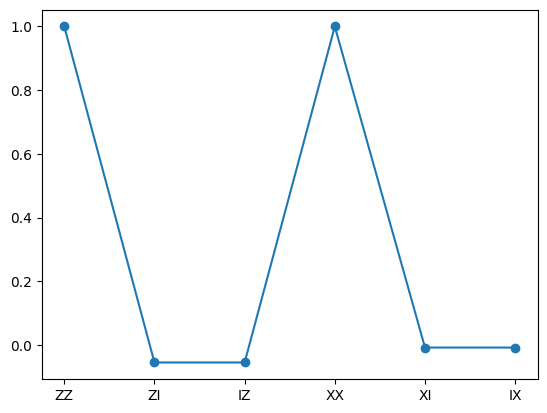

In [26]:
plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Value')
plt.show()